In [117]:
# !pip install pandas 
# !pip install numpy
#!pip install scipy
from scipy.linalg import hadamard
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

Task 1: 




In [83]:
# author - Mathuranathan Viswanathan (gaussianwaves.com
# This code is part of the book Digital Modulations using Python

from numpy import sum,isrealobj,sqrt
from numpy.random import standard_normal

def awgn(s,SNRdB,L=1):
    """
    AWGN channel
    Add AWGN noise to input signal. The function adds AWGN noise vector to signal 's' to generate a resulting signal vector 'r' of specified SNR in dB. It also
    returns the noise vector 'n' that is added to the signal 's' and the power spectral density N0 of noise added
    Parameters:
        s : input/transmitted signal vector
        SNRdB : desired signal to noise ratio (expressed in dB) for the received signal
        L : oversampling factor (applicable for waveform simulation) default L = 1.
    Returns:
        r : received signal vector (r=s+n)
    """
    s = np.array(s)
    gamma = 10**(SNRdB/10) #SNR to linear scale
    if s.ndim==1:# if s is single dimensional vector
        P=L*sum(abs(s)**2)/len(s) #Actual power in the vector
    else: # multi-dimensional signals like MFSK
        P=L*sum(sum(abs(s)**2))/len(s) # if s is a matrix [MxN]
    N0=P/gamma # Find the noise spectral density
    if isrealobj(s):# check if input is real/complex object type
        n = sqrt(N0/2)*standard_normal(s.shape) # computed noise
    else:
        n = sqrt(N0/2)*(standard_normal(s.shape)+1j*standard_normal(s.shape))
    r = s + n # received signal
    return r


Task 2: Create a function that takes S as an input and creates the associated
signal

Where S is a binary symmetric matrix and the associated signal, s, is 

In [134]:
def bin(nn):
    '''
    function: 
        return the lexigraphical version of an int 
    params: 
        nn: int to turn into lex vector
    '''
    bn = np.array([(nn >> (n-1-i)) & 1 for i in range(n)])
    return bn

def bsm():
    '''
    creates a binary symmetric matrix 
    '''
    S = np.random.rand(n,n) <0.6
    S = S.astype(int)
    S = np.tril(S) + np.tril(S, -1).T
    return S

def signal_function(n):
    '''
    function:
        Returns the associated signal of S
    params: 
        n: size of the matrix we want 
        
    '''
    j = 1j 

    #step 1: create the bsm
    S = bsm()
   
    #print("This is our binary symmetric matrix: \n", S)
    
  
    # step 2: create signals 
    c = list() #non binary signal 
    ci = list() #complex signal 


    for nn in range(0,2**n):
        x = bin(nn)
        
    
        #step 2.1: get the value of xSx^t and append it to our codeword c
        left_vector = np.dot(x,S)
        fully_mult_vector = np.dot(left_vector,x.T) % 4
        c.append(fully_mult_vector)

    # step 2.2: complex signal 
    for nb in c:
        cp = j**nb
        ci.append(cp)


    return(ci,S)
    

Task 3: Decode an inputed signal 

In [136]:
 def shift_ei(s, i):
    '''
    function: 
        creates the shift
    params: 
        s: inputed signal
        i: indices
    '''
    s = np.array(s)
    n = int(math.log(len(s),2))
    mask = 1 << i #bit shift by i places 
    ind = np.arange(len(s)) ^ mask #xor for each number in 0-2^n
    return s[ind]


def signal_decode(s):
    '''
    function: 
        return the matrix associated with a given signal s
    params: 
        s: inputed signal
    '''
    #step 1: define static varibales 
    n = int(math.log(len(s),2))
    S = np.zeros((int(n), int(n)))
    conj = np.conj(s)
    H = hadamard(2**n)
    backrows = [] # it all came out backwards for some reason but it is still correct!

    #step 2: dot and multiply 
    for i in range(0,n):
        shifted = np.array(shift_ei(s,i)) # shifted vectors 
        fi = conj * shifted 
        hi = np.dot(H,fi)
        si = np.abs(hi) 
        si_id = np.argmax(si) 
        binn = bin(si_id) # getting the lexigraphical reps of the max indicies of hi
        backrows.append(binn)

    rrows = np.array(backrows[::-1]) #flipped backrows 
   
    #step 3: construct S
    for i,row in enumerate(rrows):
        S[i:] = row #construct the matrix 

    S = S.astype(int)

    #print("This is our S:\n")
    return(S)
    

    

Task 4: Trial Runs

In [141]:
n = 4
trials = 1000
SNR = [-4,-2,0,2,4,6,8]


count_1 = [0] * len(SNR)
for v,i in enumerate(SNR):
    #p = error_prob[i]
    for t in range(trials):
        sig,S = signal_function(n)
        awgn_s = awgn(sig,i)
        awgn_S = signal_decode(awgn_s)
        if (S != awgn_S).any():
            count_1[v] += 1
    count_1[v] = count_1[v] / trials
print(count_1)

n = 5
count_2 = [0] * len(SNR)
for v,i in enumerate(SNR):
    #p = error_prob[i]
    for t in range(trials):
        sig,S = signal_function(n)
        awgn_s = awgn(sig,i)
        awgn_S = signal_decode(awgn_s)
        if (S != awgn_S).any():
            count_2[v] += 1
    count_2[v] = count_2[v] / trials
print(count_2)

n = 6
count_3 = [0] * len(SNR)
for v,i in enumerate(SNR):
    #p = error_prob[i]
    for t in range(trials):
        sig,S = signal_function(n)
        awgn_s = awgn(sig,i)
        awgn_S = signal_decode(awgn_s)
        if (S != awgn_S).any():
            count_3[v] += 1
    count_3[v] = count_3[v] / trials
print(count_3)



[0.975, 0.868, 0.64, 0.273, 0.04, 0.0, 0.0]
[0.973, 0.826, 0.411, 0.07, 0.002, 0.0, 0.0]
[0.931, 0.577, 0.089, 0.0, 0.0, 0.0, 0.0]


Task 5: Plots and Analysis 

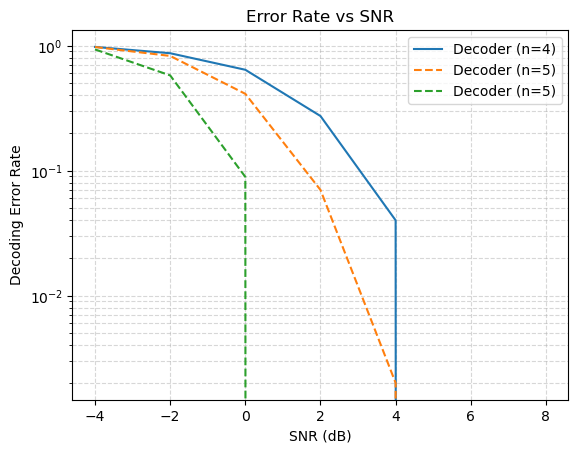

In [142]:

fig, ax = plt.subplots()

ax.semilogy(
    SNR,
    count_1,
    linestyle='-',
    label='Decoder (n=4)'
)
ax.semilogy(
    SNR,
    count_2,
    linestyle='--',
    label='Decoder (n=5)'
)
ax.semilogy(
    SNR,
    count_3,
    linestyle='--',
    label='Decoder (n=5)'
)

ax.set_xlabel('SNR (dB)')
ax.set_ylabel('Decoding Error Rate')
ax.set_title('Error Rate vs SNR')
ax.grid(True, which='both', linestyle='--', alpha=0.5)
ax.legend(loc='upper right')

plt.show()


To understand these results, we have to recall that the SNR is the signal to noise ratio. With this in mind, these results make sense. More noise than signal is transmitted when SNR is less than 0, so it would be difficult for the decoder to decode mostly noise. I would expect to see a strong drop off once SNR is greater than 0, and that is what we see. Additionally, we can note that a greater n leads to a more efficent decoding. I think this is due to the amount of codewords possible when n = 5, 32, compared to n = 4, 16. I ran another simulation for when n = 6 to confirm and it looks like a higher n does lead to more efficent decoding. 